In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from sklearn.model_selection import train_test_split

In [ ]:
fer2013_dataset_file_path = 'fer2013.csv'

In [ ]:
train_images = []
train_labels = []

val_images = []
val_labels = []

test_images = []
test_labels = []

with open(fer2013_dataset_file_path) as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  for row_id, row in enumerate(csv_reader):
    if row_id == 0:
      continue
    label = np.zeros(7)
    label[int(row[0])] = 1

    image = list(map(int, row[1].split(' ')))
    
    if row[2] == 'Training':
      train_labels.append(label)
      train_images.append(image)
    elif row[2] == 'PrivateTest':
      test_labels.append(label)
      test_images.append(image)
    elif row[2] == 'PublicTest':
      val_labels.append(label)
      val_images.append(image)

train_labels = np.asarray(train_labels, dtype=np.float32)
train_images = np.asarray(train_images, dtype=np.float32).reshape(-1, 48, 48, 1)

val_labels = np.asarray(val_labels, dtype=np.float32)
val_images = np.asarray(val_images, dtype=np.float32).reshape(-1, 48, 48, 1)

test_labels = np.asarray(test_labels, dtype=np.float32)
test_images = np.asarray(test_images, dtype=np.float32).reshape(-1, 48, 48, 1)


In [ ]:
print('Train images:', train_images.shape)
print('Train labels:', train_labels.shape)

print('Val images:', val_images.shape)
print('Val labels:', val_labels.shape)

print('Test images:', test_images.shape)
print('Test labels:', test_labels.shape)

Train images: (28709, 48, 48, 1)
Train labels: (28709, 7)
Val images: (3589, 48, 48, 1)
Val labels: (3589, 7)
Test images: (3589, 48, 48, 1)
Test labels: (3589, 7)


In [ ]:
# normalization
train_images /= 255
val_images /= 255
test_images /= 255

Print Data Instance

In [ ]:
emotions = {
    0: 'Angry', 
    1: 'Disgust',
    2: 'Fear', 
    3: 'Happy',
    4: 'Sad', 
    5: 'Surprise', 
    6: 'Neutral'
}

Label array: [0. 0. 0. 0. 0. 1. 0.] 
Label: 5 
Emotion: Surprise 
Image shape: (48, 48, 1)


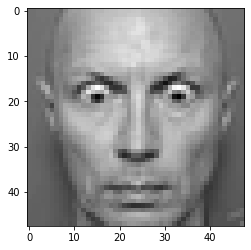

In [ ]:
index = 15
print('Label array:', train_labels[index], '\nLabel:', np.argmax(train_labels[index]),
      '\nEmotion:', emotions[np.argmax(train_labels[index])],
      '\nImage shape:', train_images[index].shape)
plt.imshow(train_images[index].reshape(48, 48), cmap='gray')
plt.show()

In [ ]:
train_history = model.fit(train_images, 
                          train_labels, 
                          batch_size=batch_size, 
                          epochs=epochs, 
                          validation_data=(val_images, val_labels), verbose=1)

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Loss:', loss, '\nAccuracy:', accuracy * 100, '%')